In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pickle
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
import os
sys.path.append('modules')
from utils_data import load_data, plot_property_histograms, compare_distributions

Loading data from file


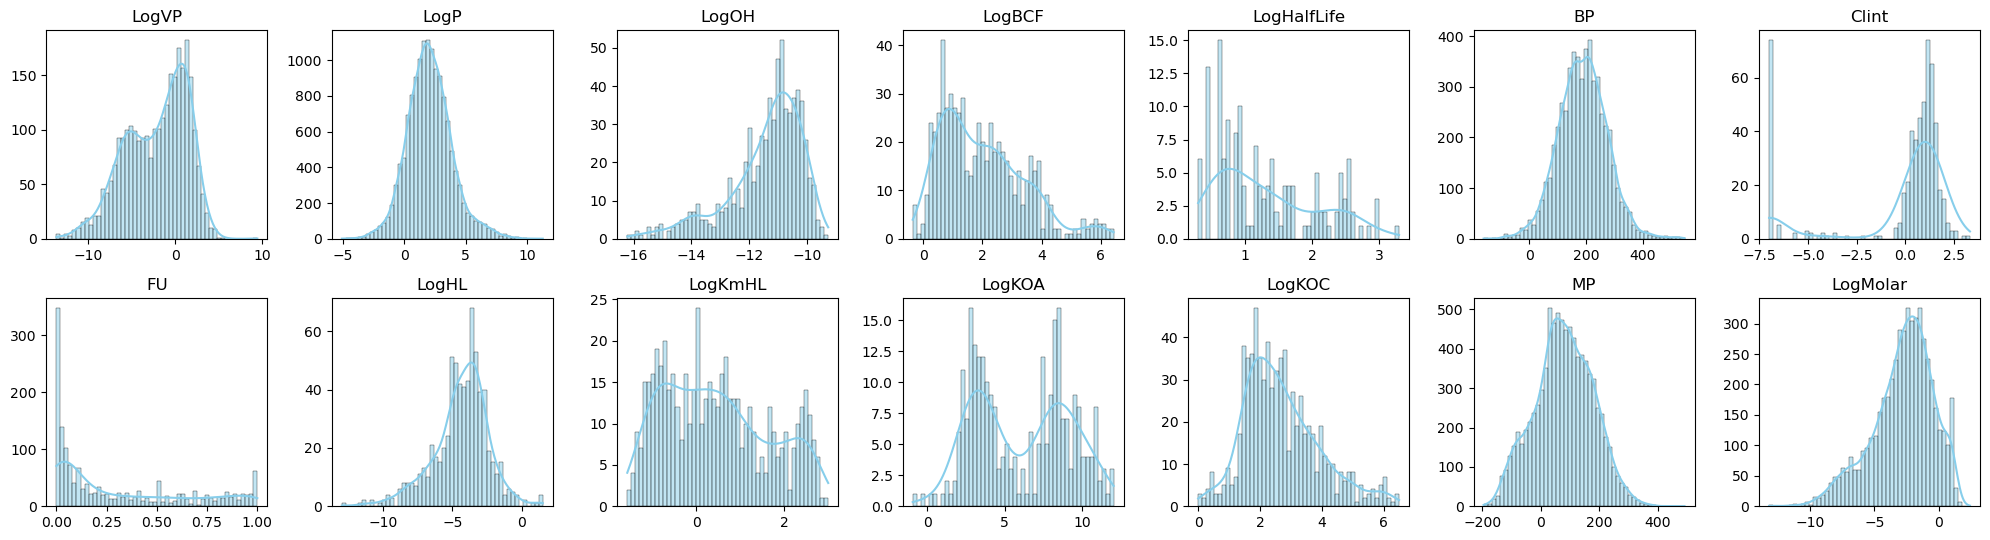

In [8]:
# Load the data
df_combined = load_data()
df_combined

# Plot the histograms of the properties
plot_property_histograms(df_combined)

In [9]:
#split check: if we do a random split 80/20, do we also get a 80/20 split for each property?
train, test = train_test_split(df_combined, test_size=0.2, random_state=42)
for col in df_combined.columns[1:]:
    print(f'{col}: {test[col].count()/df_combined[col].count()}')

LogVP: 0.19005328596802842
LogP: 0.20147702014770202
LogOH: 0.17630057803468208
LogBCF: 0.1794871794871795
LogHalfLife: 0.19333333333333333
BP: 0.19860114117430516
Clint: 0.21245421245421245
FU: 0.18753894080996886
LogHL: 0.1750358680057389
LogKmHL: 0.17190388170055454
LogKOA: 0.18518518518518517
LogKOC: 0.19640387275242047
MP: 0.19798657718120805
LogMolar: 0.20590490797546013


In [10]:
print(train['LogVP'].min(), train['LogVP'].max())

-13.677799318285588 5.243025639740706


LogVP: MannwhitneyuResult(statistic=621562.0, pvalue=0.49065826932018)
LogP: MannwhitneyuResult(statistic=15488698.0, pvalue=0.40509698489509427)
LogOH: MannwhitneyuResult(statistic=34035.5, pvalue=0.7141621324366001)
LogBCF: MannwhitneyuResult(statistic=28190.0, pvalue=0.7805376931248362)
LogHalfLife: MannwhitneyuResult(statistic=1734.0, pvalue=0.9240833659084389)
BP: MannwhitneyuResult(statistic=2301404.0, pvalue=0.3022858571831639)
Clint: MannwhitneyuResult(statistic=25997.0, pvalue=0.48297318456882443)
FU: MannwhitneyuResult(statistic=195347.5, pvalue=0.9007237520137501)
LogHL: MannwhitneyuResult(statistic=34479.0, pvalue=0.7681442831570467)
LogKmHL: MannwhitneyuResult(statistic=21793.0, pvalue=0.48381247999507615)
LogKOA: MannwhitneyuResult(statistic=5109.0, pvalue=0.43333837685050247)
LogKOC: MannwhitneyuResult(statistic=39823.0, pvalue=0.5222747067334923)
MP: MannwhitneyuResult(statistic=5956131.0, pvalue=0.772989287713154)
LogMolar: MannwhitneyuResult(statistic=2194501.0, pvalu

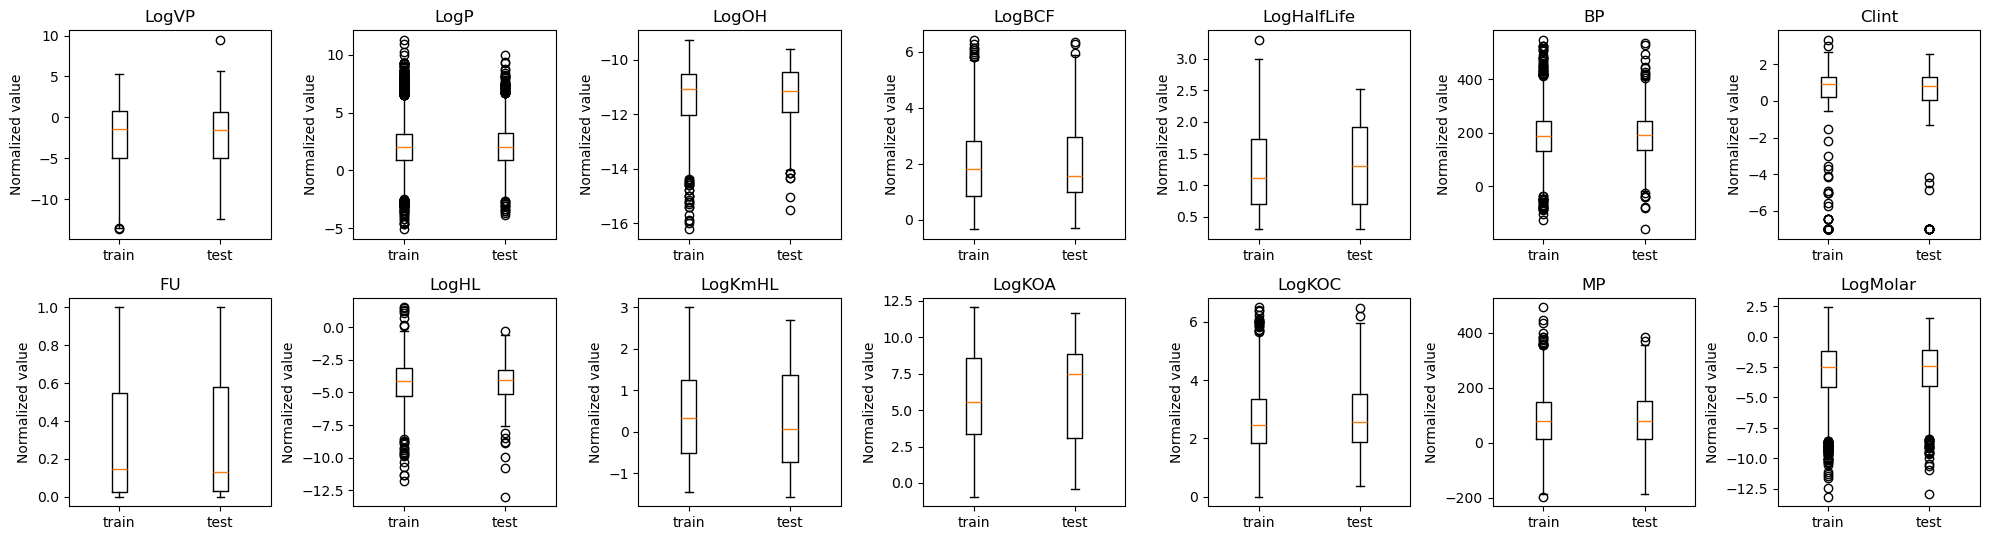

In [11]:
compare_distributions(df_combined, train, test)

In [12]:
print(f'duplicated smiles: {df_combined.SMILES.duplicated().sum()}')
if not os.path.exists('data'):
    os.makedirs('data')
train.to_csv('data/train.csv',index=False)
test.to_csv('data/test.csv',index=False)
print(f'Number of training datapoints: {len(train)}\nNumber of training datapoints: {len(test)}')

duplicated smiles: 0
18582 4646
